# Imports

In [38]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from backtesting import Backtest, Strategy

import multiprocessing as mp

from skopt.plots import plot_evaluations, plot_objective

# Data

In [2]:
df = pd.read_excel('data/MSFT_linkedin_processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2023-12-08,369.200012,374.459991,368.230011,374.230011,20144800,-0.789126,DOWN
2023-12-11,368.480011,371.600006,366.100006,371.299988,27708800,0.822698,UP
2023-12-12,370.850006,374.420013,370.459991,374.380005,24838300,-0.002674,DOWN


In [3]:
# Define target and explanatory 

target = df.change_tomorrow
explanatory = df[['Open', 'High', 'Low', 'Close','Volume']]

In [4]:
# Call the model
model_dt = DecisionTreeRegressor(max_depth=15)

# Fit the model 

model_dt.fit(X=explanatory,y=target)

DecisionTreeRegressor(max_depth=15)

Plot the tree

[Text(0.9440665763728172, 0.96875, 'Volume <= 92951148.0\nsquared_error = 3.219\nsamples = 1766\nvalue = 0.086'),
 Text(0.8948657426888281, 0.90625, 'Volume <= 91578148.0\nsquared_error = 3.104\nsamples = 1762\nvalue = 0.077'),
 Text(0.8914994477172312, 0.84375, 'Volume <= 87003952.0\nsquared_error = 2.934\nsamples = 1761\nvalue = 0.087'),
 Text(0.8031966652640438, 0.78125, 'Volume <= 78979100.0\nsquared_error = 2.905\nsamples = 1759\nvalue = 0.082'),
 Text(0.6366899852724595, 0.71875, 'Volume <= 78451200.0\nsquared_error = 2.886\nsamples = 1750\nvalue = 0.092'),
 Text(0.6333236903008627, 0.65625, 'Volume <= 46526000.0\nsquared_error = 2.849\nsamples = 1749\nvalue = 0.087'),
 Text(0.43504102671996636, 0.59375, 'Volume <= 37795750.0\nsquared_error = 2.459\nsamples = 1626\nvalue = 0.116'),
 Text(0.25978329476120343, 0.53125, 'Low <= 245.825\nsquared_error = 2.16\nsamples = 1492\nvalue = 0.066'),
 Text(0.1600042078687145, 0.46875, 'Close <= 251.93\nsquared_error = 1.899\nsamples = 996\nva

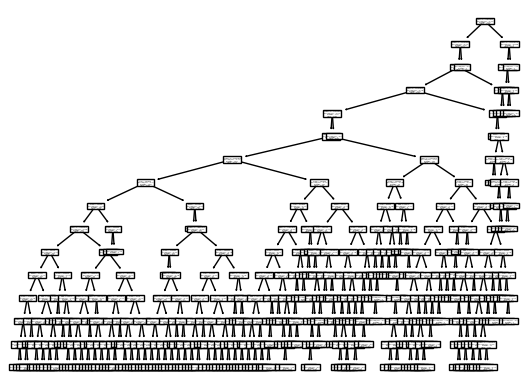

In [5]:
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

In [6]:
# Prediction

y_pred = model_dt.predict(X=explanatory)

In [7]:
# Compare predictions with reality

df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549141,1.098976
2016-12-09,0.321694,0.472320
2016-12-12,1.286125,1.098976
2016-12-13,-0.478620,-0.806372
2016-12-14,-0.159793,0.280520
...,...,...
2023-12-08,-0.789126,-0.019548
2023-12-11,0.822698,0.387066
2023-12-12,-0.002674,0.387066


In [8]:
# Score

model_dt.score(X=explanatory, y=target)

0.5126713547241495

We can say that our model capture 51% of variability 

Calculate error

In [9]:
df_predictions['error'] = df_predictions.prediction - df_predictions.change_tomorrow
df_predictions

,change_tomorrow,prediction,error
Date,,,
2016-12-08,1.549141,1.098976,-0.450165
2016-12-09,0.321694,0.472320,0.150626
2016-12-12,1.286125,1.098976,-0.187149
2016-12-13,-0.478620,-0.806372,-0.327751
2016-12-14,-0.159793,0.280520,0.440313
...,...,...,...
2023-12-08,-0.789126,-0.019548,0.769577
2023-12-11,0.822698,0.387066,-0.435632
2023-12-12,-0.002674,0.387066,0.389740


In [10]:
df_predictions['error2'] = df_predictions.error**2
df_predictions

,change_tomorrow,prediction,error,error2
Date,,,,
2016-12-08,1.549141,1.098976,-0.450165,0.202649
2016-12-09,0.321694,0.472320,0.150626,0.022688
2016-12-12,1.286125,1.098976,-0.187149,0.035025
2016-12-13,-0.478620,-0.806372,-0.327751,0.107421
2016-12-14,-0.159793,0.280520,0.440313,0.193876
...,...,...,...,...
2023-12-08,-0.789126,-0.019548,0.769577,0.592249
2023-12-11,0.822698,0.387066,-0.435632,0.189775
2023-12-12,-0.002674,0.387066,0.389740,0.151897


In [11]:
sse = df_predictions.error2.sum() # Sum square of error

In [12]:
mse = df_predictions.error2.mean() # Mean square error

In [13]:
rmse = np.sqrt(mse) #root mean square error
rmse

NameError: name 'np' is not defined

<Axes: >

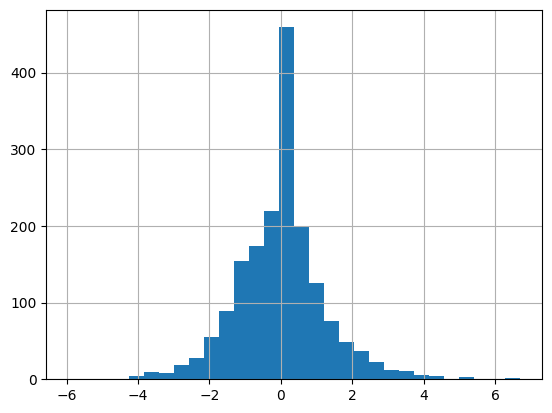

In [14]:
# Plot the errors

df_predictions.error.hist(bins=30)

## Backtesting

We are buying if it increase more than 1% and selling if it decrease more than 5%

In [15]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -5 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [16]:
bt = Backtest(explanatory, Regression, cash=10000, commission=.002, exclusive_orders=True)

In [17]:
results = bt.run()

#Show in data frame
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2023-12-14 00:00:00
Duration,2562 days 00:00:00
Exposure Time [%],99.830125
Equity Final [$],55654.052634
Equity Peak [$],57053.164817
Return [%],456.540526


In [18]:
# Plot

bt.plot(filename='backtest_report.html')

/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values f

GridPlot(id='p1305', ...)

## Optimizing Strategy Parameters - Grid Search

In [19]:
class Regression(Strategy):
    limit_buy = 1
    limit_sell = -5

    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [20]:
bt = Backtest(explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

In [21]:
# Lets Create List for limit_buy and limit_sell 

list_limits_buy = list(range(0, 11, 1))

list_limits_sell = list(range(0, -11, -1))

In [22]:
results = bt.optimize(
    limit_buy = list_limits_buy, limit_sell= list_limits_sell,
    maximize='Return [%]', return_heatmap=True
)

/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


In [23]:
# Store result in frame
dff = results[1].reset_index()

In [24]:
dff = dff.pivot(index='limit_buy', columns='limit_sell', values='Return [%]')
dff

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,478.871330,478.871330,501.533387,520.489002,520.489002,674.801999,1342.454310,2776.281400,5404.817545,12033.615666,23861.590975
1,471.671552,471.671552,448.963624,465.500225,465.500225,456.540526,865.465330,1092.241823,1197.821233,1233.651891,319.140202
2,322.877780,322.877780,305.325219,319.435295,319.435295,330.492244,696.789729,435.157946,95.922584,129.267077,-1.590449
3,322.877780,322.877780,305.325219,258.668509,258.668509,267.056641,419.866532,-15.125640,-79.908010,-58.384233,-68.712629
4,322.877780,322.877780,305.325219,258.668509,258.668509,337.680877,483.708159,-24.724919,-77.655307,-72.152076,-75.601269
5,322.877780,322.877780,305.325219,258.668509,258.668509,337.680877,420.707301,-30.940905,-78.463697,-75.683150,-79.133323
6,322.877780,322.877780,305.325219,258.668509,258.668509,210.912305,154.179684,-100.000000,-100.000000,-100.000000,-100.000000
7,150.719848,150.719848,140.263937,140.263937,140.263937,59.111308,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
8,136.518923,136.518923,-42.868750,-42.868750,-42.868750,-90.751211,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [25]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0).background_gradient()

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,23862,12034,5405,2776,1342,675,520,520,502,479,479
1,319,1234,1198,1092,865,457,466,466,449,472,472
2,-2,129,96,435,697,330,319,319,305,323,323
3,-69,-58,-80,-15,420,267,259,259,305,323,323
4,-76,-72,-78,-25,484,338,259,259,305,323,323
5,-79,-76,-78,-31,421,338,259,259,305,323,323
6,-100,-100,-100,-100,154,211,259,259,305,323,323
7,-100,-100,-100,-100,-100,59,140,140,140,151,151
8,-100,-100,-100,-100,-100,-91,-43,-43,-43,137,137


In [26]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0).background_gradient(vmin=dff.values.min(), vmax=dff.values.max())

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,23862,12034,5405,2776,1342,675,520,520,502,479,479
1,319,1234,1198,1092,865,457,466,466,449,472,472
2,-2,129,96,435,697,330,319,319,305,323,323
3,-69,-58,-80,-15,420,267,259,259,305,323,323
4,-76,-72,-78,-25,484,338,259,259,305,323,323
5,-79,-76,-78,-31,421,338,259,259,305,323,323
6,-100,-100,-100,-100,154,211,259,259,305,323,323
7,-100,-100,-100,-100,-100,59,140,140,140,151,151
8,-100,-100,-100,-100,-100,-91,-43,-43,-43,137,137


## Smart Search

In [27]:
if mp.get_start_method(allow_none=True) is None:
    mp.set_start_method('fork')

In [39]:
stats_skopt, heatmap, optimize_result = bt.optimize(
    limit_buy=[0, 10],
    limit_sell=[-10, 0],
    maximize='Return [%]',
    method='skopt',
    max_tries=500,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

We are facing problem with numpy version try to implement this in a new notebook in future

In [33]:
dff = heatmap.reset_index()
dff = dff.pivot(index='limit_buy', columns='limit_sell', values='Return [%]')
dff

NameError: name 'heatmap' is not defined

In [34]:
dff.style.highlight_null(props='background-color: transparent; color: transparent') #null because we have null values

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,478.871330,478.871330,501.533387,520.489002,520.489002,674.801999,1342.454310,2776.281400,5404.817545,12033.615666,23861.590975
1,471.671552,471.671552,448.963624,465.500225,465.500225,456.540526,865.465330,1092.241823,1197.821233,1233.651891,319.140202
2,322.877780,322.877780,305.325219,319.435295,319.435295,330.492244,696.789729,435.157946,95.922584,129.267077,-1.590449
3,322.877780,322.877780,305.325219,258.668509,258.668509,267.056641,419.866532,-15.125640,-79.908010,-58.384233,-68.712629
4,322.877780,322.877780,305.325219,258.668509,258.668509,337.680877,483.708159,-24.724919,-77.655307,-72.152076,-75.601269
5,322.877780,322.877780,305.325219,258.668509,258.668509,337.680877,420.707301,-30.940905,-78.463697,-75.683150,-79.133323
6,322.877780,322.877780,305.325219,258.668509,258.668509,210.912305,154.179684,-100.000000,-100.000000,-100.000000,-100.000000
7,150.719848,150.719848,140.263937,140.263937,140.263937,59.111308,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
8,136.518923,136.518923,-42.868750,-42.868750,-42.868750,-90.751211,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [32]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))\
    .highlight_null(props='background-color: transparent; color: transparent')

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,23862,12034,5405,2776,1342,675,520,520,502,479,479
1,319,1234,1198,1092,865,457,466,466,449,472,472
2,-2,129,96,435,697,330,319,319,305,323,323
3,-69,-58,-80,-15,420,267,259,259,305,323,323
4,-76,-72,-78,-25,484,338,259,259,305,323,323
5,-79,-76,-78,-31,421,338,259,259,305,323,323
6,-100,-100,-100,-100,154,211,259,259,305,323,323
7,-100,-100,-100,-100,-100,59,140,140,140,151,151
8,-100,-100,-100,-100,-100,-91,-43,-43,-43,137,137


In [35]:
# Plot all possible numbers of limit_sell and limit_buy 

_ = plot_evaluations(optimize_result, bins=10)

NameError: name 'optimize_result' is not defined

In [36]:
# Plot as density plot

_ = plot_objective(optimize_result, n_points=10)

NameError: name 'optimize_result' is not defined